# DSM - Tokenização

In [2]:
import pandas as pd
from pathlib import Path
from nltk.tokenize import RegexpTokenizer


raw_data_path = Path('../data/raw/socialmedia_relevant_cols.csv')
processed_data_path = Path('../data/processed/std_socialmedia_relevant_cols.csv')

img_path = Path("../imgs")


df = pd.read_csv(processed_data_path)

In [3]:
df

,text,choose_one,class_label
0,just happened a terrible car crash,relevant,1
1,our deeds are the reason of this earthquake ma...,relevant,1
2,heard about earthquake is different cities sta...,relevant,1
3,there is a forest fire at spot pond geese are ...,relevant,1
4,forest fire near la ronge sask canada,relevant,1
...,...,...,...
10871,m194 0104 utc5km s of volcano hawaii tcozdtoyd...,relevant,1
10872,police investigating after an ebike collided w...,relevant,1
10873,the latest more homes razed by northern califo...,relevant,1
10874,meg issues hazardous weather outlook hwo tco3x...,relevant,1


In [4]:
tokenizer = RegexpTokenizer(r'\w+')
df['tokens'] = df['text'].apply(tokenizer.tokenize)
df

,text,choose_one,class_label,tokens
0,just happened a terrible car crash,relevant,1,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this earthquake ma...,relevant,1,"[our, deeds, are, the, reason, of, this, earth..."
2,heard about earthquake is different cities sta...,relevant,1,"[heard, about, earthquake, is, different, citi..."
3,there is a forest fire at spot pond geese are ...,relevant,1,"[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask canada,relevant,1,"[forest, fire, near, la, ronge, sask, canada]"
...,...,...,...,...
10871,m194 0104 utc5km s of volcano hawaii tcozdtoyd...,relevant,1,"[m194, 0104, utc5km, s, of, volcano, hawaii, t..."
10872,police investigating after an ebike collided w...,relevant,1,"[police, investigating, after, an, ebike, coll..."
10873,the latest more homes razed by northern califo...,relevant,1,"[the, latest, more, homes, razed, by, northern..."
10874,meg issues hazardous weather outlook hwo tco3x...,relevant,1,"[meg, issues, hazardous, weather, outlook, hwo..."


In [5]:
df.to_csv('../data/processed/tokenized_std_socialmedia_relevant_cols.csv', index=False)

In [9]:
all_words = [word for tokens in df['tokens'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in df['tokens']]

vocab = sorted(list(set(all_words)))

In [10]:
print(f'Total quantity of words: {len(all_words)}')
print(f'vocabulary length: {len(vocab)}')
print(f'Sentence max length: {max(sentence_lengths)}')

Total quantity of words: 159287
vocabulary length: 28338
Sentence max length: 31


### Sentence distribution per word quantity

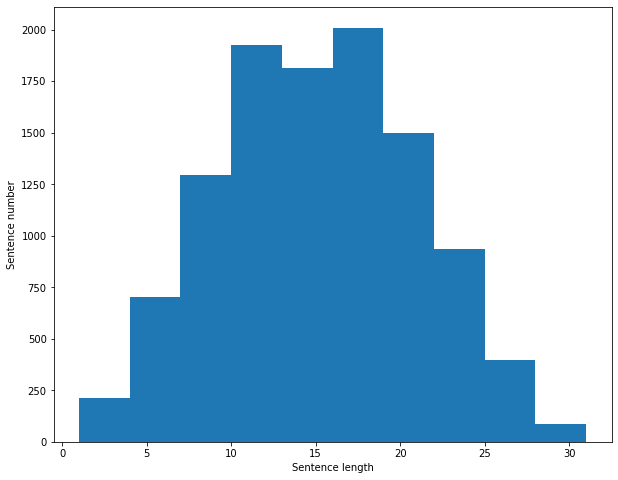

In [11]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10,8))
plt.xlabel("Sentence length")
plt.ylabel("Sentence number")
plt.hist(sentence_lengths)
plt.savefig(img_path / 'sentence_distribution_x_word_quantity.jpg')
